In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Reading Excel files
file_path = 'Data/Elite_Rate.xlsx'
df = pd.read_excel(file_path)

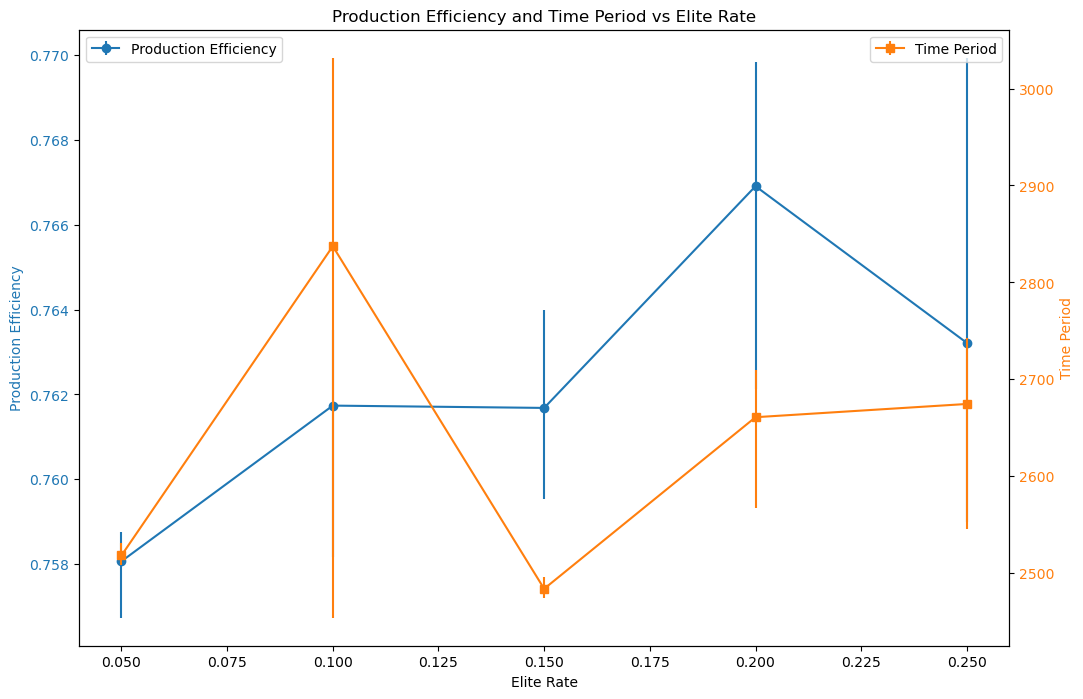

In [3]:
# Grouped by Elite Rate and calculated statistics for Production Efficiency and Time Period
grouped = df.groupby('Elite Rate').agg({
    'Production Efficiency': ['min', 'mean', 'max'],
    'Time Period': ['min', 'mean', 'max']
}).reset_index()

# Create charts
fig, ax1 = plt.subplots(figsize=(12, 8))

# Set Production Efficiency and Time Period colours
color1 = 'tab:blue'
color2 = 'tab:orange'

# Plot a line graph of Production Efficiency with the error line indicating the range
ax1.errorbar(grouped['Elite Rate'], grouped['Production Efficiency']['mean'], 
             yerr=[grouped['Production Efficiency']['mean'] - grouped['Production Efficiency']['min'],
                   grouped['Production Efficiency']['max'] - grouped['Production Efficiency']['mean']],
             fmt='-o', color=color1, label='Production Efficiency')

# Set the first y-axis label
ax1.set_xlabel('Elite Rate')
ax1.set_ylabel('Production Efficiency', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Create a second y-axis for Time Period data
ax2 = ax1.twinx()
ax2.errorbar(grouped['Elite Rate'], grouped['Time Period']['mean'], 
             yerr=[grouped['Time Period']['mean'] - grouped['Time Period']['min'],
                   grouped['Time Period']['max'] - grouped['Time Period']['mean']],
             fmt='-s', color=color2, label='Time Period')

# Set the second y-axis label
ax2.set_ylabel('Time Period', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Add title and legend
plt.title('Production Efficiency and Time Period vs Elite Rate')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show charts
plt.show()

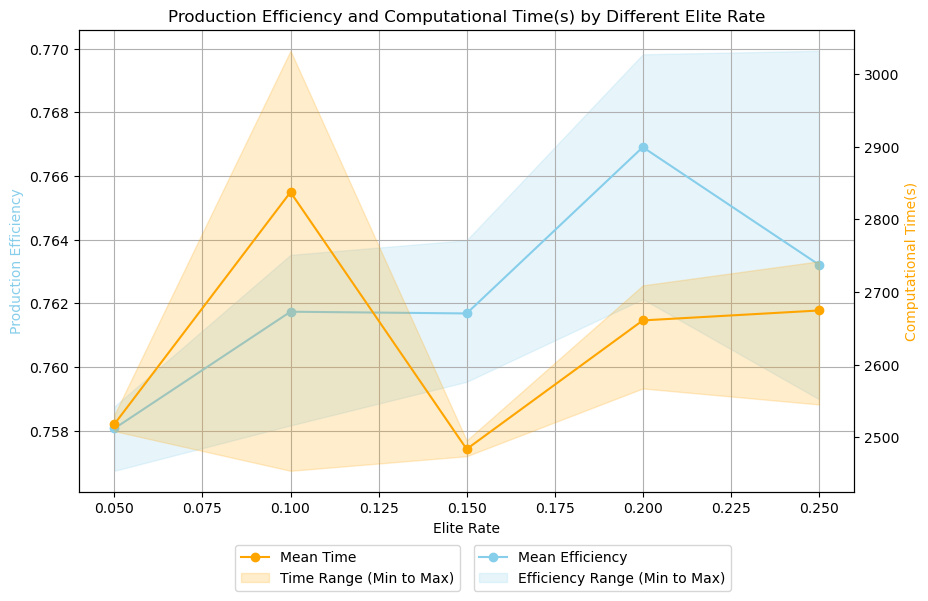

In [4]:
# Assuming the data structure in the file has columns like 'Cross Rate', 'Production Efficiency', 'Time Period'
# Group by 'Cross Rate' and calculate the statistics for each group
grouped = df.groupby('Elite Rate').agg({
    'Production Efficiency': ['min', 'max', 'mean'],
    'Time Period': ['min', 'max', 'mean']
}).reset_index()

# Flatten the MultiIndex columns
grouped.columns = ['Elite Rate', 'PE_min', 'PE_max', 'PE_mean', 'TP_min', 'TP_max', 'TP_mean']

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Production Efficiency mean and range in blue
ax1.plot(grouped['Elite Rate'], grouped['PE_mean'], label='Mean Efficiency', color='skyblue', marker='o')
ax1.fill_between(grouped['Elite Rate'], grouped['PE_min'], grouped['PE_max'], color='skyblue', alpha=0.2, label='Efficiency Range (Min to Max)')

# Plot Time Period mean and range in orange
ax2 = ax1.twinx()
ax2.plot(grouped['Elite Rate'], grouped['TP_mean'], label='Mean Time', color='orange', marker='o')
ax2.fill_between(grouped['Elite Rate'], grouped['TP_min'], grouped['TP_max'], color='orange', alpha=0.2, label='Time Range (Min to Max)')

# Adding labels and titles
ax1.set_xlabel('Elite Rate')
ax1.set_ylabel('Production Efficiency', color='skyblue')
ax2.set_ylabel('Computational Time(s)', color='orange')
plt.title('Production Efficiency and Computational Time(s) by Different Elite Rate')

# Show grid and legends
ax1.grid(True)
ax1.legend(loc='upper left', bbox_to_anchor=(0.5, -0.1))
ax2.legend(loc='upper right', bbox_to_anchor=(0.5, -0.1))

plt.show()